# WeatherPy

In [2]:
##### *** Import Dependencies *** #####

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
from citipy import citipy

##### *** API Configuration *** #####

## Import API Key
from config import api_key

## Weather API URL
url = "http://api.openweathermap.org/data/2.5/weather?"

## Build Query URL
query_url = url + "appid=" + api_key + "&q="

##### *** Additional Needed Parameters for Temperature Conversion *** #####
## Temp is expressed in Kelvin (scientific measure), this function converts to fahrenheit

def kelvin_f(in_temp):
    _temp = (in_temp - 273.15) * (9/5) + 32
    return _temp
  

## Generate Cities List

In [3]:
#### *** Randomly select at least 500 unique cities (non-repeated) based on latitude and longitude ***  ####

## List Containers Needed for Generating the Cities List
cities = []
lat_long = []

## Additional Needed Parameters for City Selection 
city_count = 1500
np.random.seed(1)

## Create a Set of Random Latitude & Longitude Combinations
lat = np.random.uniform(-90.000, 90.000, city_count)
long = np.random.uniform(-180.000, 180.000, city_count)
lat_long = zip(lat, long)

## Identify Nearest City for Each Latitude & Longitude Combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    ## If the City is Unique, then Add it to the Cities List:
    if city not in cities:
        cities.append(city)

## Print the City Count to Confirm Sufficient Count
len(cities)


644

## Perform Needed API Calls

In [4]:

##### *** Initialize Variable Objects Needed for API Calls *** #####

city_weather = []

for c in cities:
    city_detail = {}


##### *** Perform API Calls *** #####

    city_data = requests.get(query_url + c)

    ## Check for 200 Response from Server for Each Call on Each Country in the List
    if city_data.status_code == 200:
        api_response = city_data.json() # Convert the api response to json
              
     ## Add City ID Key-Values Pairs to City Detail Dictionary       
        city_detail.update({'City_ID': int(api_response['id'])}) # changing to int doesn't remove decimal
        
    ## Add City Name Key-Values Pairs to City Detail Dictionary                 
        city_detail.update({'City_Name': api_response['name']})     
        
    ## Print City ID & City Name to Console as API Calls are Processed         
        print(f'City ID: {city_detail["City_ID"]}  City Name: {city_detail["City_Name"]}')

    ## Add Date Key-Values Pairs to City Detail Dictionary           
        city_detail.update({'Date': datetime.fromtimestamp(api_response['dt']).date()}) # GMT Unix timestamp converted to date only
  
    ## Add Country Key-Values Pairs to City Detail Dictionary
        for key, value in api_response['sys'].items():
            if key == 'country':
                city_detail.update({'Country': value})
        
    ## Add Cloudiness Key-Values Pairs to City Detail Dictionary
        for key, value in api_response['clouds'].items():
            if key == 'all':
                city_detail.update({'Cloudiness': int(value)})               
                
    ## Add Max Wind Speed Key-Values Pairs to City Detail Dictionary 
        for key, value in api_response['wind'].items():
            if key == 'speed':
                city_detail.update({'Wind_Speed': round(value,1)})
             
    ## Add Longitude & Latitude Key-Values Pairs to City Detail Dictionary
        for key, value in api_response['coord'].items():
            if key == 'lat':
                city_detail.update({'Lat': value})
            elif key == 'lon':
                city_detail.update({'Long': value})

    ## Add Humidity & Max Temp Key-Values Pairs to City Detail Dictionary                        
        for key, value in api_response['main'].items():
            if key == 'humidity':
                city_detail.update({'Humidity': int(value)}) # This is a percentage (%) w/o meaningful digits
            elif key == 'temp_max':
                city_detail.update({'Max_Temp': round(kelvin_f(value),1)}) # kelvin_f is a function defined above to convert to fahrenheit

                
    ## Insert Compiled City Weather Details into City Weather Object
    city_weather.append(city_detail)


City ID: 4030556  City Name: Rikitea
City ID: 121380  City Name: Pārsābād
City ID: 964432  City Name: Port Alfred
City ID: 3471451  City Name: Arraial do Cabo
City ID: 6201424  City Name: Mataura
City ID: 3366880  City Name: Hermanus
City ID: 3369157  City Name: Cape Town
City ID: 2070998  City Name: Geraldton
City ID: 3932145  City Name: Pisco
City ID: 3408368  City Name: Acaraú
City ID: 3652764  City Name: Puerto Ayora
City ID: 1131461  City Name: Oruzgan
City ID: 2191562  City Name: Dunedin
City ID: 6185377  City Name: Yellowknife
City ID: 5106841  City Name: Albany
City ID: 4677008  City Name: Bryan
City ID: 4035715  City Name: Avarua
City ID: 4020109  City Name: Atuona
City ID: 2206939  City Name: Bluff
City ID: 2155415  City Name: New Norfolk
City ID: 5919850  City Name: Chapais
City ID: 2126199  City Name: Cherskiy
City ID: 2071860  City Name: Esperance
City ID: 3372472  City Name: Vila Franca do Campo
City ID: 2630299  City Name: Hofn
City ID: 4032243  City Name: Vaini
City ID:

City ID: 1803331  City Name: Linxia Chengguanzhen
City ID: 3533462  City Name: Acapulco de Juárez
City ID: 934322  City Name: Mahébourg
City ID: 3372964  City Name: Lagoa
City ID: 4034188  City Name: Moerai
City ID: 3412093  City Name: Vestmannaeyjar
City ID: 315498  City Name: Heraclea
City ID: 1735106  City Name: George Town
City ID: 986717  City Name: Kruisfontein
City ID: 831130  City Name: Znamensk
City ID: 1835848  City Name: Seoul
City ID: 6167817  City Name: Torbay
City ID: 3414079  City Name: Olafsvik
City ID: 1043893  City Name: Lichinga
City ID: 3416888  City Name: Grindavik
City ID: 1785738  City Name: Yuncheng
City ID: 5814916  City Name: Walla Walla
City ID: 4997130  City Name: Ingham
City ID: 2037485  City Name: Erenhot
City ID: 1640902  City Name: Kawalu
City ID: 3693584  City Name: Pimentel
City ID: 3404558  City Name: Cabedelo
City ID: 2020591  City Name: Magdagachi
City ID: 547677  City Name: Kletskaya
City ID: 172515  City Name: Abu Samrah
City ID: 2409914  City Nam

City ID: 1650434  City Name: Bambanglipuro
City ID: 5870133  City Name: Nome
City ID: 3579925  City Name: St. George's
City ID: 1061412  City Name: Mananara
City ID: 1071296  City Name: Antalaha
City ID: 1214488  City Name: Meulaboh
City ID: 1852357  City Name: Shimoda
City ID: 2027109  City Name: Barguzin
City ID: 608271  City Name: Shubarkuduk
City ID: 1895695  City Name: Kushima
City ID: 1258501  City Name: Rangāpāra
City ID: 2138555  City Name: Poum
City ID: 6255012  City Name: Flinders
City ID: 3904906  City Name: Santa Cruz de la Sierra
City ID: 550512  City Name: Kharovsk
City ID: 2523082  City Name: Syracuse
City ID: 1486321  City Name: Yar-Sale
City ID: 3403344  City Name: Canindé de São Francisco
City ID: 2027296  City Name: Aykhal
City ID: 3832791  City Name: Villa Carlos Paz
City ID: 3401148  City Name: Cururupu
City ID: 2729907  City Name: Longyearbyen
City ID: 462008  City Name: Zubtsov
City ID: 3893629  City Name: Coquimbo
City ID: 1696177  City Name: Bahile
City ID: 336

### Convert Raw Data to DataFrame

In [6]:

##### *** Convert Raw Data to DataFrame *** #####

city_weather_df = pd.DataFrame(city_weather)

##### *** Format DataFrame *** #####

## Drop NaN Values
city_weather_df = city_weather_df.dropna()

## Check there are still more than 500 cities in dataframe
len(city_weather_df) # Number in sample = 644

## Reorder Dataframe
city_weather_df = city_weather_df[['Date','City_ID','City_Name','Country',
                                   'Lat','Long', 'Max_Temp','Cloudiness', 
                                   'Humidity', 'Wind_Speed']]

##### *** Save Dataframe as .csv *** #####

city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False) # Note to avoid issues, use encoding="utf-8"
city_weather_df.head()


,Date,City_ID,City_Name,Country,Lat,Long,Max_Temp,Cloudiness,Humidity,Wind_Speed
0,2020-02-25,4030556.0,Rikitea,PF,-23.12,-134.97,80.2,100.0,70.0,2.7
1,2020-02-25,121380.0,Pārsābād,IR,39.65,47.92,44.6,75.0,87.0,3.1
2,2020-02-25,964432.0,Port Alfred,ZA,-33.59,26.89,78.0,1.0,61.0,1.8
3,2020-02-25,3471451.0,Arraial do Cabo,BR,-22.97,-42.03,76.6,88.0,87.0,9.5
4,2020-02-25,6201424.0,Mataura,NZ,-46.19,168.86,72.1,83.0,74.0,1.7


## Plotting the Data

In [7]:

##### *** Initialize Needed Variables for Plotting *** #####

## Define Date for Plot Titles
Date_plot =  city_weather_df["Date"][0]

## Define X-Axis - Latitude
Latitude = np.array(city_weather_df["Lat"])


#### Latitude vs. Temperature Plot

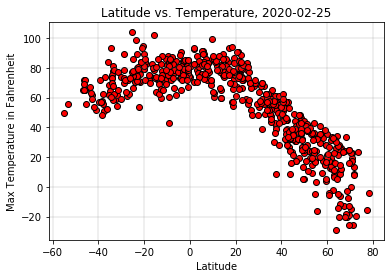

<Figure size 432x288 with 0 Axes>

In [8]:

### Y-Axis - Max Temperature
Temp = np.array(city_weather_df["Max_Temp"])

### Format Plot
plt.title("Latitude vs. Temperature, {}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Plot X vs Y - Latitude vs Max Temperature
plt.scatter(Latitude, Temp, marker="o", facecolors="red", edgecolors="black")
plt.show()

### Save the Figure as .png
plt.savefig("Latitude vs. Temperature Plot.png")

##### *** Explanation of what this Code is Analyzing ***  ######################################################

# Code is analyzing the relationship b/w our x-variable Latitude and y-variable
# Max Temperature in degrees Fahrenheit. This is a scatter plot of the relationship 
# between latitude and maximum temperature. This plot shows a curvilinear relationship 
# b/w latitude and max temp. There is a sharp negative relationship b/w latitude and max 
# temp the father you move north. It also appears that there is a higher concentration of 
# northern cities in this sample, and this may be b/c there are more countries and cities 
# in the northern hemisphere than in the southern hemisphere in general (a socio-geographic fact), 
# so the sampling might be heavily weighted toward the Northern Hemisphere.


#### Latitude vs. Humidity Plot

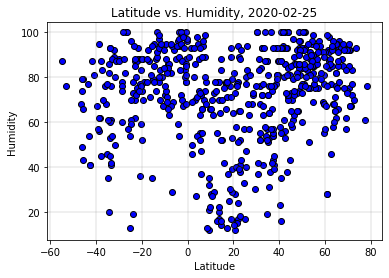

<Figure size 432x288 with 0 Axes>

In [9]:
### Y-Axis - Humidity
Humidity = np.array(city_weather_df["Humidity"])

### Format Plot
plt.title("Latitude vs. Humidity, {}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Plot X vs Y - Latitude vs Humidity
plt.scatter(Latitude, Humidity, marker="o", facecolors="blue", edgecolors="black")
plt.show()

### Save the Figure as .png
plt.savefig("Latitude vs. Humidity Plot.png")

##### *** Explanation of what this Code is Analyzing ***  #######################################

# Code is analyzing the relationship b/w our x-variable Latitude and y-variable
# Humidity. There isn't clear patternicity to this plot, but in general it seems
# that most cities have humidity percentages b/w 60-100% at the time the API was queried.
# Even though there seems to be not much of a pattern, there is some visual 
# evidence that there may be patternicity to the feature space, so the best method
# for parsing that out would be to use non-parametric ML methods, like k-nearest 
# neighbors.


#### Latitude vs. Cloudiness Plot

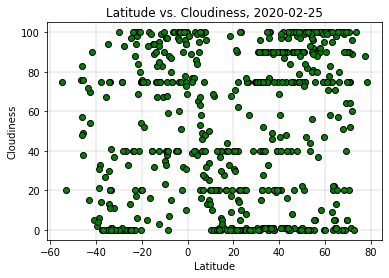

<Figure size 432x288 with 0 Axes>

In [10]:
### Y-Axis - Cloudiness
Cloudiness = np.array(city_weather_df["Cloudiness"])

### Format Plot
plt.title("Latitude vs. Cloudiness, {}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Plot X vs Y - Latitude vs Cloudiness
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="green", edgecolors="black")
plt.show()

### Save the Figure as .png
plt.savefig("Latitude vs. Cloudiness Plot.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# Code is analyzing the relationship b/w our x-variable Latitude and y-variable
# Cloudiness. First, this is an interesting looking graph. Though there seems to 
# be discernable patterns here, I suspect it is because of the likelihood that
# there is consistency in how "cloudiness" is being reported, were the most frequent
# responses are appearing as the lines at 0, 20, 40, 75, 90, and 100 percent cloudiness. 
# I also suspect that time of day at the location when the API was queried might influence 
# some of this pattern.


#### Latitude vs. Wind Speed Plot

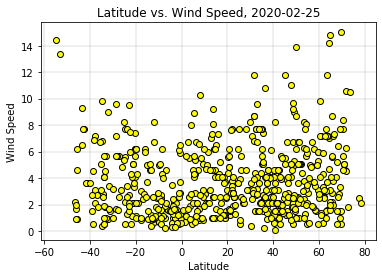

<Figure size 432x288 with 0 Axes>

In [11]:
### Y-Axis - Wind_Speed
Wind_Speed = np.array(city_weather_df["Wind_Speed"])

### Format Plot
plt.title("Latitude vs. Wind Speed, {}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Plot X vs Y - Latitude vs Wind Speed
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="yellow", edgecolors="black")
plt.show()

### Save the Figure as .png
plt.savefig("Latitude vs. Wind Speed Plot.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# Code is analyzing the relationship b/w our x-variable Latitude and y-variable
# Wind Speed. Besides a couple outliers, there seems to be a consistently flat
# relationship between latitude and wind speed, or in other words, no relationship.
# You could run tests to verify this, such as regression and calculate the correlation
# coefficients.


## Linear Regression

In [12]:

### Create Separate Series Northern & Southern Hemispheres
Northern_df =  city_weather_df.loc[city_weather_df["Lat"] > 0, :] 
Southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0, :] 

##### *** Initialize Needed Variables ***  #####

## Define X-Axis - Latitude
Latitude_North = np.array(Northern_df["Lat"])
Latitude_South = np.array(Southern_df["Lat"])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Equation: y = -1.28x + 95.59
R-Squared: -0.9019922060726676


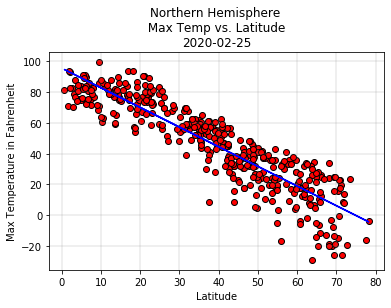

<Figure size 432x288 with 0 Axes>

In [14]:
### Y-Axis - Max Temp
Temp_North = np.array(Northern_df["Max_Temp"])

### Format Plot
plt.title("Northern Hemisphere \n Max Temp vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Max Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_North, Temp_North)
regress_values_north = Latitude_North * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_North, Temp_North, marker="o", facecolors="red", edgecolors="black")
plt.plot(Latitude_North,regress_values_north,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Northern Temp vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of max temperature (in Fahrenheit) on latitude for the Northern Hemisphere.
# There is a fairly strong negative relationship b/w max temperature and latitude, with
# approximately 90.1% of variation being explained by the model. For every degree you move 
# north in latitude away from the equator, there is a decline in temperature by 1.3 degrees 
# fahrenheit.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Equation: y = 0.36x + 81.31
R-Squared: 0.46636986021710736


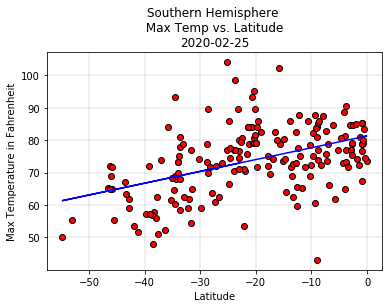

<Figure size 432x288 with 0 Axes>

In [16]:
### Y-Axis - Max Temp
Temp_South = np.array(Southern_df["Max_Temp"])

### Format Plot
plt.title("Southern Hemisphere \n Max Temp vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Fahrenheit")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Max Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_South, Temp_South)
regress_values_south = Latitude_South * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_South, Temp_South, marker="o", facecolors="red", edgecolors="black")
plt.plot(Latitude_South,regress_values_south,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Southern Temp vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of max temperature (in Fahrenheit) on latitude for the Southern Hemisphere.
# There is a moderate positive relationship b/w max temperature and latitude, with
# approximately 46.6% of variation being explained by the regression model. For every degree you move 
# toward the equator (moving south to north) there is an increase in temperature by 0.36 degrees 
# fahrenheit. This relationship is not as strong as the one modeled for the Northern Hemisphere.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Equation: y = 0.42x + 55.0
R-Squared: 0.37827111305380146


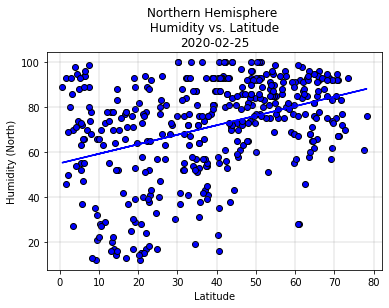

<Figure size 432x288 with 0 Axes>

In [17]:
### Y-Axis - Max Temp
Humidity_North = np.array(Northern_df["Humidity"])

### Format Plot
plt.title("Northern Hemisphere \n Humidity vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Humidity (North)")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_North, Humidity_North)
regress_values_north = Latitude_North * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_North, Humidity_North, marker="o", facecolors="blue", edgecolors="black")
plt.plot(Latitude_North,regress_values_north,"b-") # look up code for the color black
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Northern Humidity vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of humidity (expressed as %) on latitude for the Northern Hemisphere.
# There is a moderate positive relationship b/w humidity and latitude, with
# approximately 37.8% of variation being explained by the regression model. For every degree you move 
# north in latitude away from the equator, there is a 4.2% increase in humidity. This relationship is 
# moderate.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Equation: y = 0.46x + 85.99
R-Squared: 0.3595677264886489


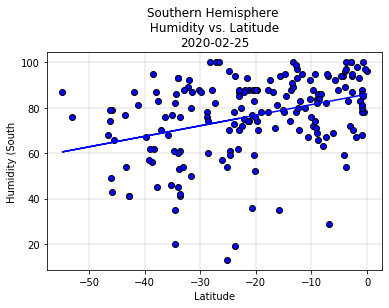

<Figure size 432x288 with 0 Axes>

In [18]:
### Y-Axis - Max Temp
Humidity_South = np.array(Southern_df["Humidity"])

### Format Plot
plt.title("Southern Hemisphere \n Humidity vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Humidity (South")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_South, Humidity_South)
regress_values_south = Latitude_South * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_South, Humidity_South, marker="o", facecolors="blue", edgecolors="black")
plt.plot(Latitude_South,regress_values_south,"b-") # look up code for the color black
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Southern Humidity vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of humidity (expressed as %) on latitude for the Southern Hemisphere.
# There is a moderate positive relationship b/w humidity and latitude, with
# approximately 36% of variation being explained by the regression model.For every degree you move 
# toward the equator (moving south to north) there is a 4.6% increase in humidity. This relationship is 
# moderate.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Equation: y = 0.53x + 32.2
R-Squared: 0.2733307511178688


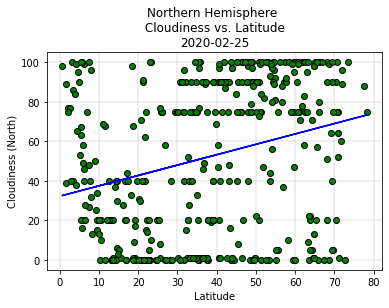

<Figure size 432x288 with 0 Axes>

In [19]:
### Y-Axis - Max Temp
Cloudiness_North = np.array(Northern_df["Cloudiness"])

### Format Plot
plt.title("Northern Hemisphere \n Cloudiness vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (North)")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_North, Cloudiness_North)
regress_values_north = Latitude_North * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_North, Cloudiness_North, marker="o", facecolors="green", edgecolors="black")
plt.plot(Latitude_North,regress_values_north,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Northern Cloudiness vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of cloudiness (expressed as %) on latitude for the Northern Hemisphere.
# There is a moderate positive relationship b/w cloudiness and latitude, with approximately 27.3% of 
# variation being explained by the regression model. For every degree you move north in latitude away 
# from the equator, there is a 5.3% increase in cloudiness. This relationship is not very strong.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Equation: y = 1.09x + 76.38
R-Squared: 0.4046965504151644


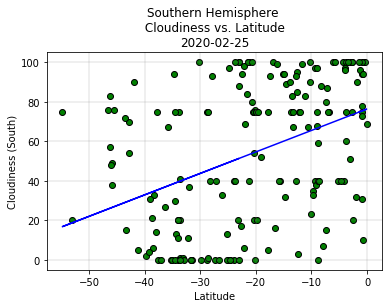

<Figure size 432x288 with 0 Axes>

In [20]:
### Y-Axis - Max Temp
Cloudiness_South = np.array(Southern_df["Cloudiness"])

### Format Plot
plt.title("Southern Hemisphere \n Cloudiness vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (South)")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_South, Cloudiness_South)
regress_values_south = Latitude_South * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_South, Cloudiness_South, marker="o", facecolors="green", edgecolors="black")
plt.plot(Latitude_South,regress_values_south,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Southern Cloudiness vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################


# This plot shows the regression of cloudiness (expressed as %) on latitude for the Southern Hemisphere.
# There is a weak/modeerate positive relationship b/w cloudiness and latitude, with
# approximately 40.5% of variation being explained by the regression model. For every degree you move 
# toward the equator (moving south to north) there is a 10.9% increase in cloudiness. This relationship is 
# not very strong.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Equation: y = 0.02x + 3.21
R-Squared: 0.13468974611269188


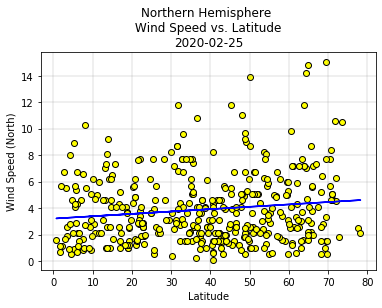

<Figure size 432x288 with 0 Axes>

In [21]:
### Y-Axis - Max Temp
Wind_North = np.array(Northern_df["Wind_Speed"])

### Format Plot
plt.title("Northern Hemisphere \n Wind Speed vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (North)")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_North, Wind_North)
regress_values_north = Latitude_North * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_North, Wind_North, marker="o", facecolors="yellow", edgecolors="black")
plt.plot(Latitude_North,regress_values_north,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Northern Wind Speed vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of wind speed on latitude for the Northern Hemisphere.
# There is a very weak positive relationship b/w wind speed and latitude, with approximately 13.5% of 
# variation being explained by the regression model. For every degree you move north in latitude away 
# from the equator, there is a 0.2 increase in wind speed. This relationship is weak.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Equation: y = -0.07x + 1.93
R-Squared: -0.3629125031974803


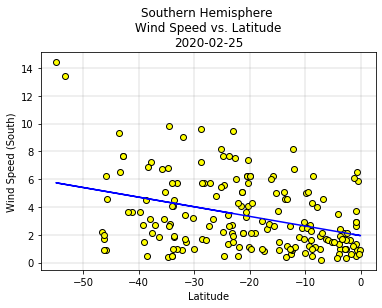

<Figure size 432x288 with 0 Axes>

In [22]:
### Y-Axis - Max Temp
Wind_South = np.array(Southern_df["Wind_Speed"])

### Format Plot
plt.title("Southern Hemisphere \n Wind Speed vs. Latitude \n{}".format(Date_plot))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (South)")
plt.grid(which="major", color='grey', linewidth=.25, linestyle="-")

### Regress Y on X - Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude_South, Wind_South)
regress_values_south = Latitude_South * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude_South, Wind_South, marker="o", facecolors="yellow", edgecolors="black")
plt.plot(Latitude_South,regress_values_south,"b-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
# plt.annotate(rvalue,(6,10),fontsize=15,color="blue") # is it possible to have 2 annotations on 1 plot?
print(f"Linear Equation: {line_eq}")
print(f"R-Squared: {rvalue}")
plt.show()

### Save the Figure as .png
plt.savefig("Southern Wind Speed vs. Latitude Linear Regression.png")

##### *** Explanation of what this Code is Analyzing ***  ##########################################

# This plot shows the regression of wind speed on latitude for the Southern Hemisphere.
# There is a very weak/moderate negative relationship b/w wind speed and latitude, with approximately 36.3% 
# of variation being explained by the regression model.For every degree you move toward the equator 
# (moving south to north) there is a 0.7 decrease in wind speed. This relationship is weak.
